# Mood classification using CNN

In [23]:
!nvidia-smi

Sat Feb  7 04:48:29 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P0             29W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to label the images & it will automatically

In [25]:
img = image.load_img("/content/drive/MyDrive/training/happy face/1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg")

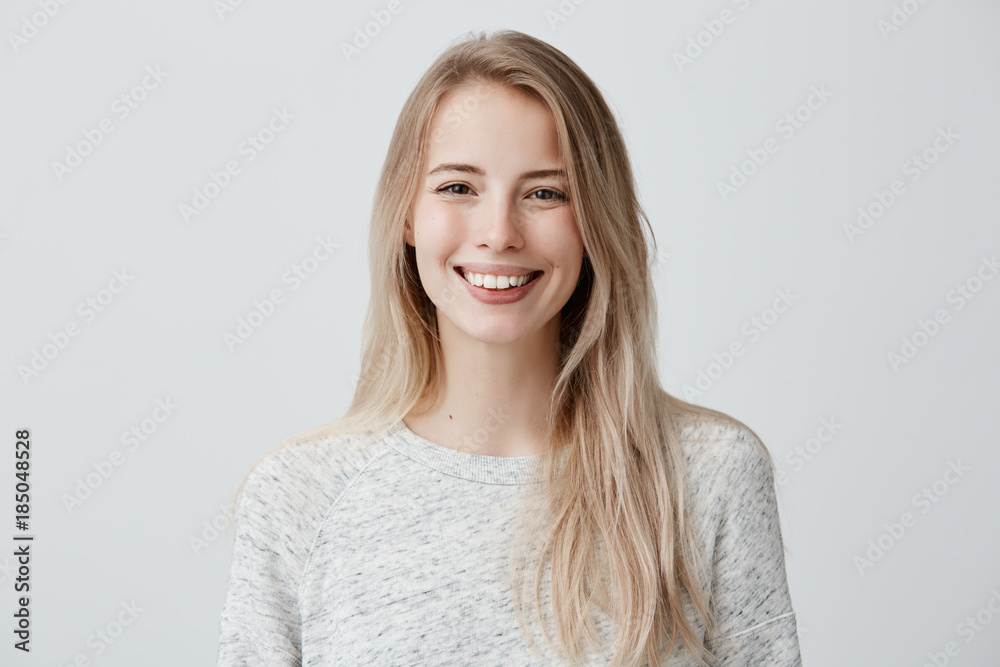

In [26]:
img

array([[[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       [[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       [[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       ...,

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [196, 192, 191],
        [195, 192, 188]],

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [196, 192, 191],
        [195, 192, 188]],

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [195, 191, 190],
        [195, 192, 188]]], dtype=uint8)
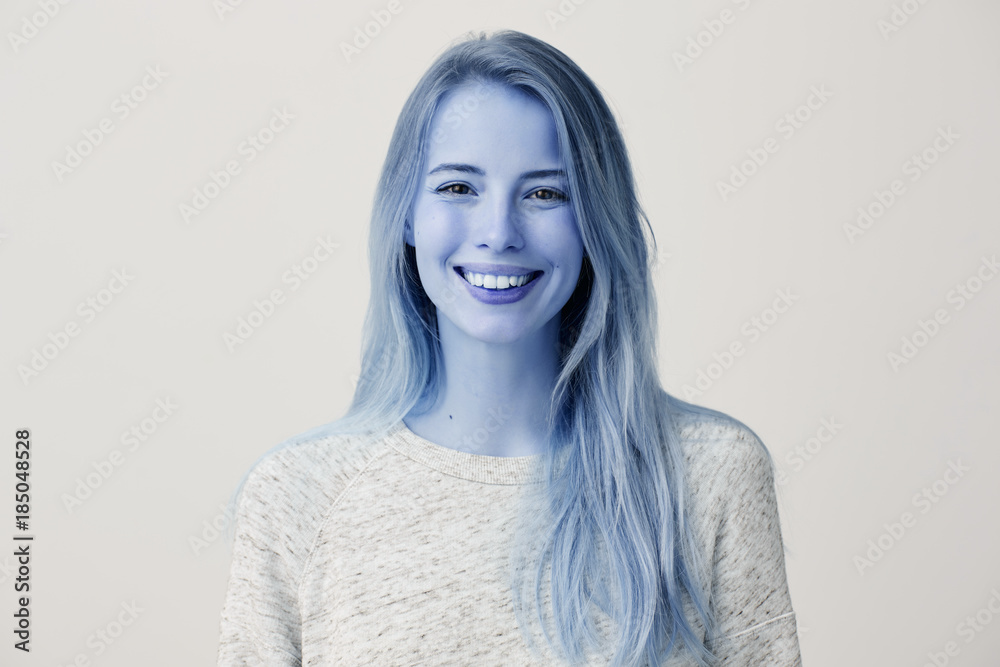

In [27]:
il=cv2.imread('/content/drive/MyDrive/training/happy face/1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg')
il

In [28]:
il.shape

(667, 1000, 3)

In [29]:
train =ImageDataGenerator(rescale=1/200)
validation =ImageDataGenerator(rescale=1/200)


In [30]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/training",
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/validation",
                                                    target_size=(200,200),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 56 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [31]:
train_dataset.class_indices

{'happy face': 0, 'sad face': 1}

In [32]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
# apply maxpooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [35]:
model_fit=model.fit(train_dataset,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5377 - loss: 4.1258
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.5556 - loss: 4.7379
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.5119 - loss: 0.7273
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.4658 - loss: 0.7069
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.5685 - loss: 0.6637
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.6806 - loss: 0.6519
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.6687 - loss: 0.6070
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.6071 - loss: 0.6649
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.7009 - loss: 0.5779
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 0.5734 - loss: 0.6443


In [36]:
dir_path='/content/drive/MyDrive/testing'
for i in os.listdir(dir_path):
  print(i)

1615497546_73304.jpeg
appy-face-human-emotion-expression-african-american-having-fun-joy-154266727.jpg
appy-face-human-emotion-expression-african-american-having-fun-joy-145301119.jpg
538692449_cb1853bb50.jpg
1566247441_4f49f3c7a4.jpg
aughing-showing-victory-gesture-in-happy-face-facial-expression-human-RGB0PF.jpg
235453015.jpg
311376157.jpg
39843138-sad-man.jpg
110062933-portrait-of-a-young-man-with-a-sad-face-expression.jpg
311376112.jpg
22757028-sad-man.jpg
84502259-sad-face-of-young-guy-close-up-of-man-crying-with-tears.jpg


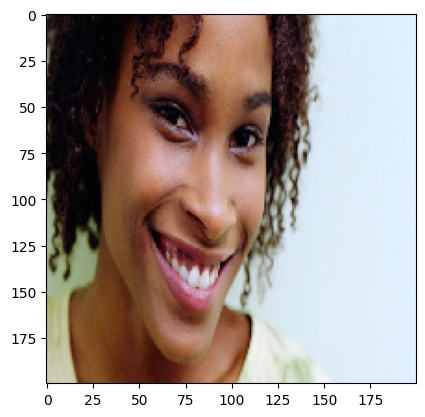

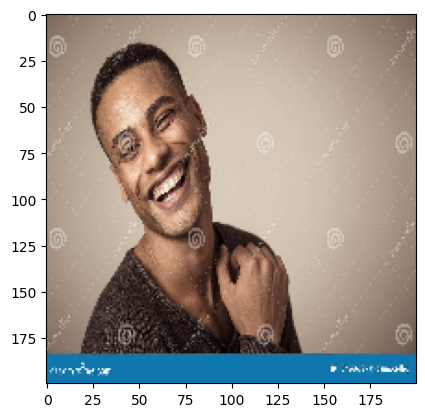

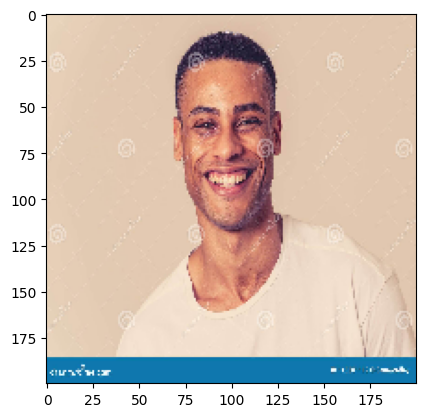

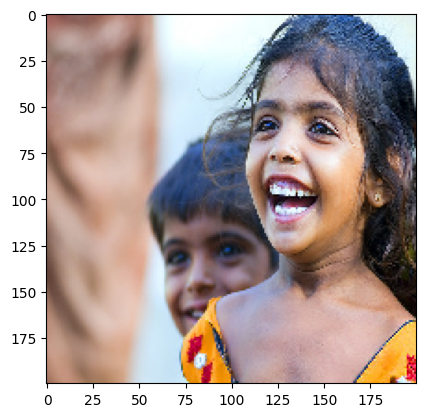

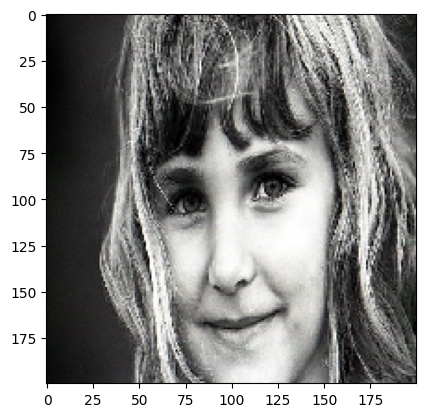

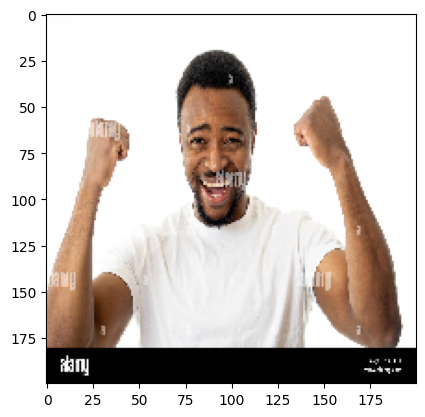

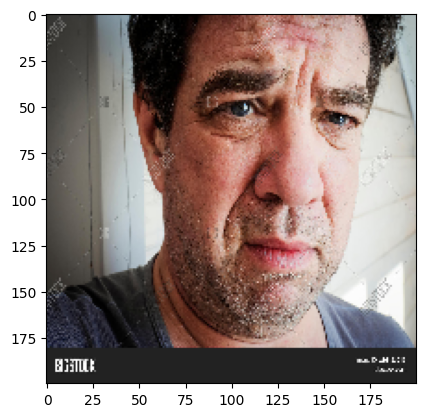

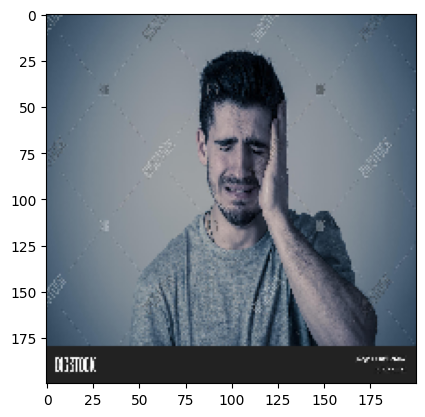

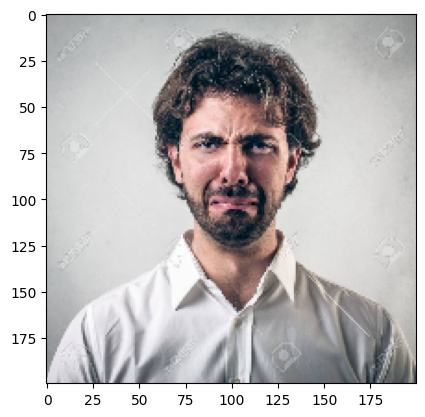

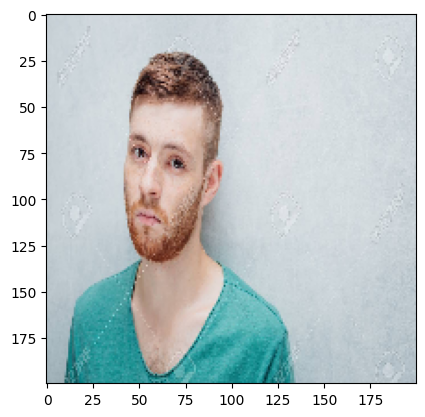

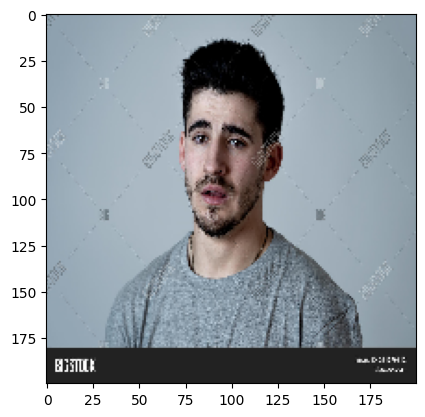

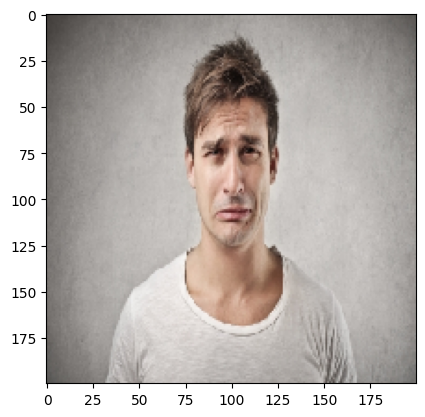

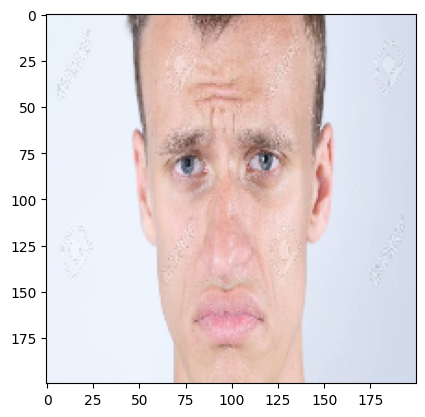

In [37]:
dir_path='/content/drive/MyDrive/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

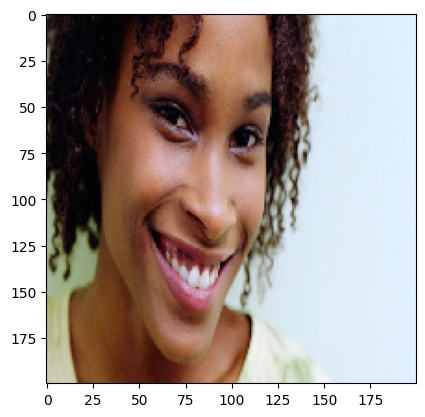

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
sad


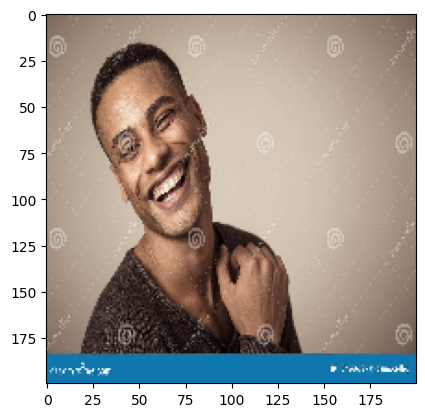

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
sad


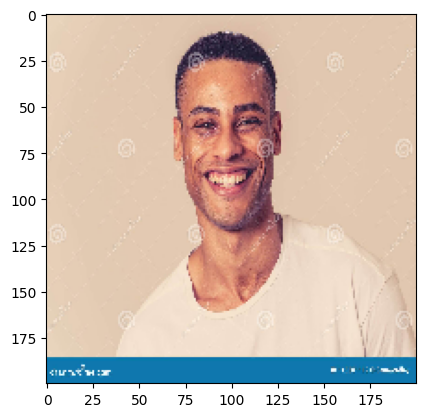

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
happy


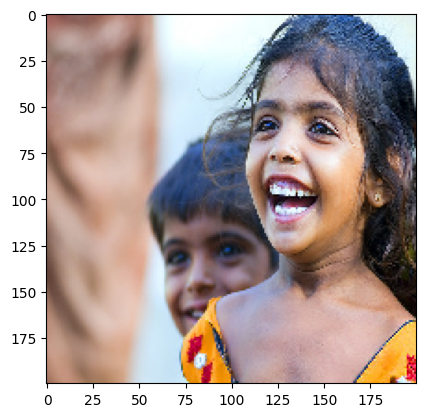

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
sad


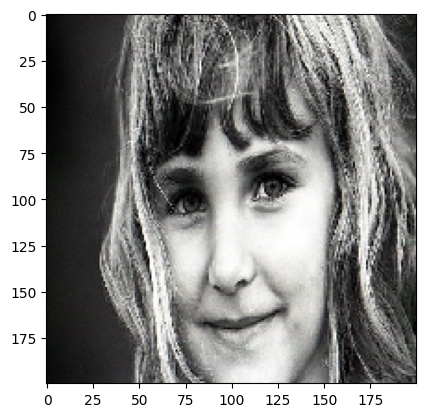

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
sad


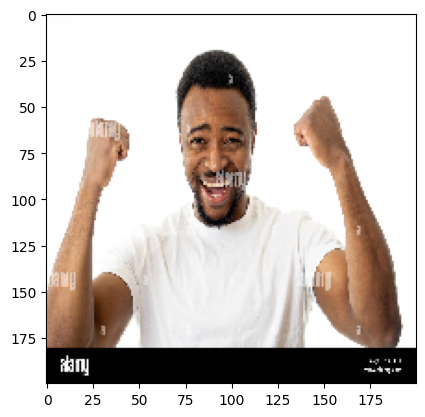

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
happy


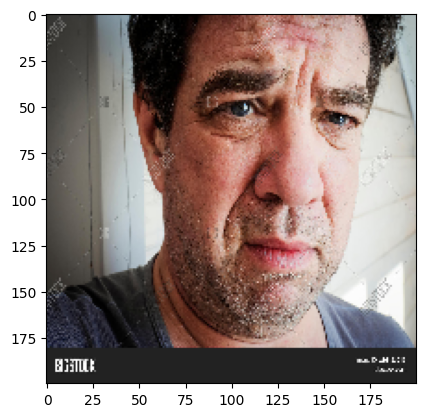

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
sad


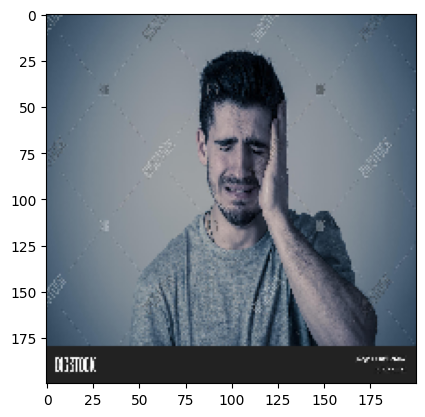

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
sad


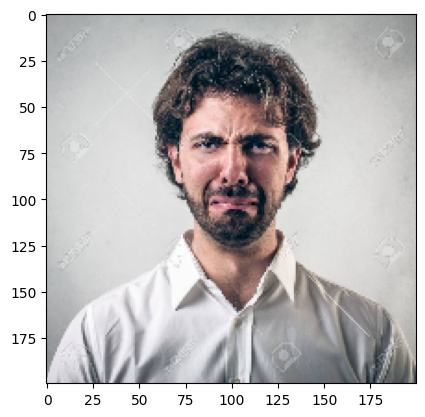

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
sad


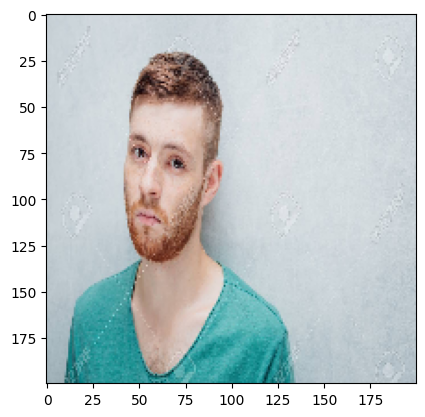

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
sad


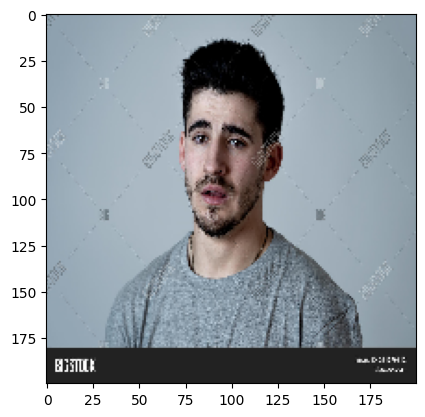

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
sad


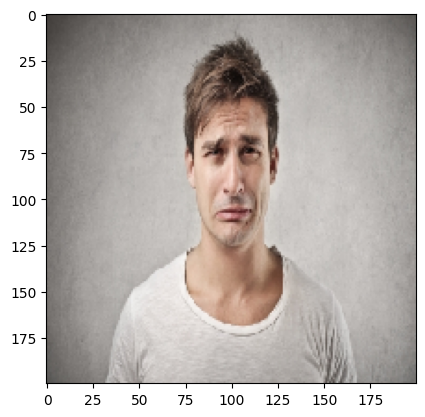

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
sad


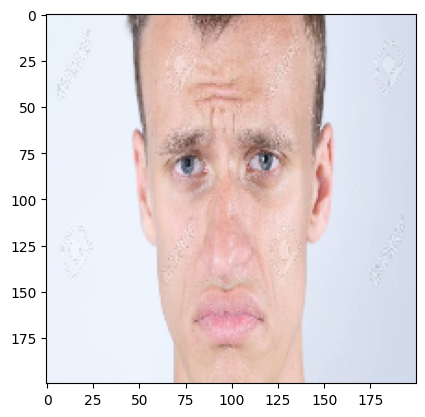

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
sad


In [38]:
dir_path='/content/drive/MyDrive/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  val=model.predict(images)
  if val==0:
    print("happy")
  else:
    print("sad")

# frontend using gradio and python

In [39]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    # Resize the image to (200, 200) as expected by the model
    img = image.resize((200, 200))
    # Convert the image to a numpy array
    x = np.array(img)
    # Expand dimensions to create a batch of 1 image
    x = np.expand_dims(x, axis=0)
    # Normalize the image (if the model was trained with normalized inputs)
    # The model was trained with rescale=1/200, so we should apply the same scaling here.
    x = x / 200.0
    # Make prediction
    val = model.predict(x)[0][0]
    # Interpret the prediction
    if val < 0.5:
        return 'Happy'
    else:
        return 'Not Happy'

In [40]:
iface = gr.Interface(fn=predict_mood,
                     inputs=gr.Image(type='pil',label='upload a image'),
                     outputs=gr.Text(label='Predicted Mood'),
                     title='Mood Classification',
                     description='Upload an image and get the predicted mood.')
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0be82e560592ac5286.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
